Collecting all the necessary functions form packages

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.color import rgb2hsv, hsv2rgb
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.signal import find_peaks

Finding and showing the example image

(-0.5, 359.5, 639.5, -0.5)

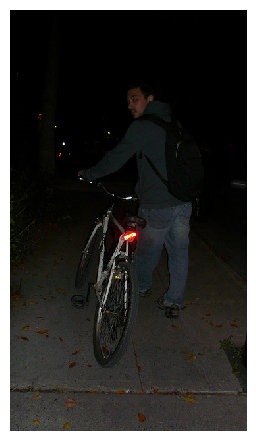

In [37]:
in_dir = "C:/Users/shaia/Pictures/Low light images/ExDark/Bicycle/"
im_name = "2015_00173.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [38]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)

Perform BBHE histogram equalisation

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

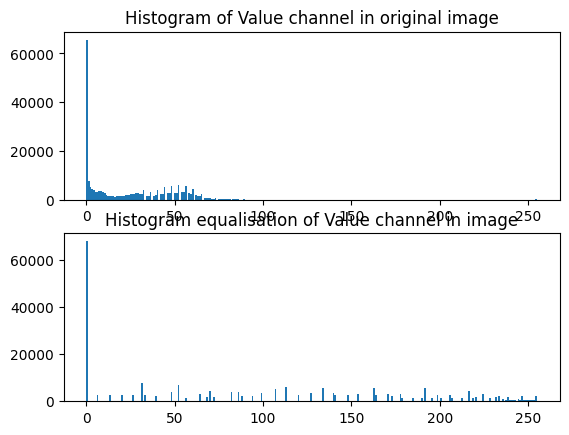

In [39]:
V_mean = np.mean(V)

V_mhigh = V[V > V_mean]
V_mlow = V[V <= V_mean]

V_mhhist = cv.equalizeHist(V_mhigh)
V_mlhist = cv.equalizeHist(V_mlow)

V_BBHE = np.zeros((V.ravel().shape[0], 1))

V_BBHE[V.ravel() <= V_mean] = V_mlhist
V_BBHE[V.ravel() > V_mean] = V_mhhist

plt.figure()

plt.subplot(2, 1, 1)
hist, _, _ = plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of Value channel in original image")

plt.subplot(2, 1, 2)
plt.hist(V_BBHE.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Perform BPHEME histogram equalisation

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

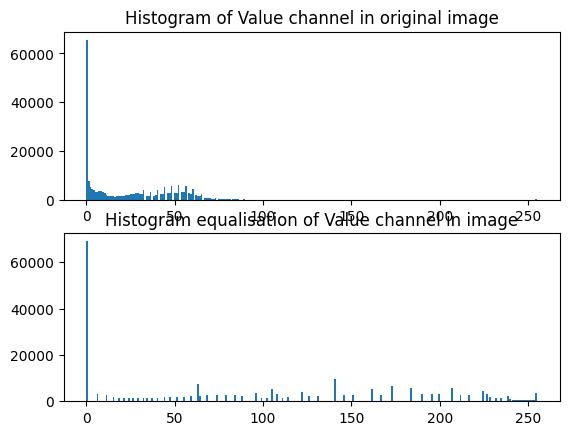

In [40]:
peaks, _ = find_peaks(hist)

if len(peaks) > 0:
    V_peak = peaks[0]
else:
    V_peak = 0

V_phigh = V[V > V_peak]
V_plow = V[V <= V_peak]

V_phhist = cv.equalizeHist(V_phigh)
V_plhist = cv.equalizeHist(V_plow)

V_BPHEME = np.zeros((V.ravel().shape[0], 1))

V_BPHEME[V.ravel() <= V_peak] = V_plhist
V_BPHEME[V.ravel() > V_peak] = V_phhist

plt.figure()

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of Value channel in original image")

plt.subplot(2, 1, 2)
plt.hist(V_BPHEME.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Transform the enhanced image back to RGB

(-0.5, 359.5, 639.5, -0.5)

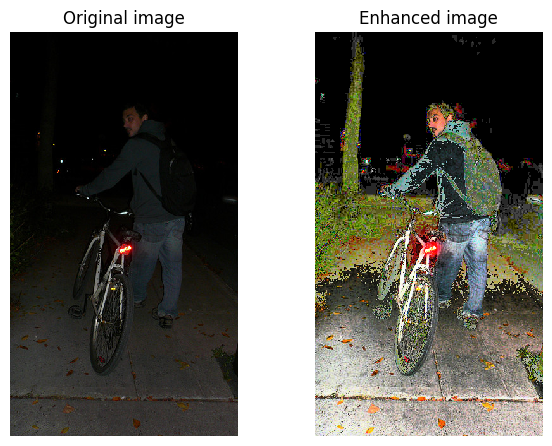

In [41]:
im_BBHEhsv = im_hsv.copy()
im_BPHEMEhsv = im_hsv.copy()

im_BBHEhsv[:, :, 2] = V_BBHE.reshape(im_hsv[:, :, 2].shape) / 255
im_BPHEMEhsv[:, :, 2] = V_BPHEME.reshape(im_hsv[:, :, 2].shape) / 255

im_BBHE = hsv2rgb(im_BBHEhsv)
im_BPHEME = hsv2rgb(im_BPHEMEhsv)

weight = 0.7
im_enh = weight * im_BBHE + (1 - weight) * im_BPHEME

im_enh = np.uint8(im_enh * 255)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Evaluation with SSIM and PSNR

In [42]:
eval_ssim = ssim(im_org, im_enh, data_range = im_enh.max() - im_enh.min(), win_size = 3)
eval_psnr = psnr(im_org, im_enh)

print("SSIM result:\t" + str(eval_ssim) + "\nPSNR result:\t" + str(eval_psnr))

SSIM result:	0.4141943233868027
PSNR result:	9.877174937518987
